# 시계열 데이터 기초

## 시계열 데이터란?

- 순차적인 시간의 흐름으로 기록된 관측치의 집합
- 시계열 데이터는 고정된 시간 구간으로 나타내야 함. 즉, A구간은 일별, B구간은 우러별인 데이터는 존재 불가

## 시계열 데이터의 특징

1. 순차적인 시간의 흐름
2. 고정된 시간 구간의 관측치

## Pandas의 시계열 데이터

- Pandas 에서의 시계열 데이터 -> DatatiemIndex 자료형 사용 : `pd.to_datetime()`
- Resample : 일별 -> 월별 / 월별 -> 일별 등과 같이 시간 간격 재조정 기능

### Down-Sampling

- 원래의 데이터가 그룹으로 묶여 대표 값 필요
- 시간 구간을 크게 만들어 데이터 양이 감소한다면 down-sampling 이라고 함
- 1년치 일별 데이터 월별 데이터로 down-sampling : 365개 -> 12개
- `groupby` 메소드처럼 각 월의 대표 값을 구해야 함 (예. 평균값, 합산값 등)

### Up-Sampling

- 실제로 존재하지 않은 데이터를 만듦
- 1년치 월별 데이터를 일별 데이터로 up-sampling : 12개 -> 365개 --> NaN 값의 처리 (생성) 필요
- Forward filling : 예전 데이터를 보관하는 방식 (시간 오름차순 기준)
- Backward filling : 최신 데이터를 보관하는 방식 (시간 오름차순 기준)

## 시계열 데이터의 시각화
- 시간을 X 축에 두어 시간의 흐름에 따른 변수의 변화를 라인 그래프로 시각화

### 시간 그래프(Time Plot)

- 시간 그래프 (또는 시도표)는 패턴, 이상치, 시간에 따른 변화, 계절성 등의 데이터의 많은 특징을 눈으로 볼 수 있게 해줌
- 시간의 흐름에 대한 변화 -> 라인 그래프
- 우상향 추세
- 여름에 많은 소비량 (계절성)
- `pandas.DataFrame.plot()`

# 실습

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## DatetimeIndex
- `pd.to_datetime()`

In [5]:
date = ["2020/01/01", "2020/02/01", "2020/03/01", "2020/04/01"]

date_idx = pd.to_datetime(date)
date_idx

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)

In [7]:
np.random.seed(1)
random_int = np.random.randint(3, 10, size=4)
random_int

array([8, 6, 7, 3])

In [10]:
s1 = pd.Series(random_int, index=date_idx)
s1

2020-01-01    8
2020-02-01    6
2020-03-01    7
2020-04-01    3
dtype: int32

In [11]:
date = ["2020.01.01", "2020.02.01", "2020.03.01", "2020.04.01"]

date_idx2 = pd.to_datetime(date)
date_idx2

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)

In [13]:
date = ["2020,01,01", "2020,02,01", "2020,03,01", "2020,04,01"]

date_idx3 = pd.to_datetime(date, format='%Y,%m,%d')
date_idx3

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)

## DatetimeIndex
- `pd.date_range()`

In [14]:
pd.date_range('2020-01-01', '2020-05-31')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', length=152, freq='D')

In [15]:
pd.date_range('2020-01-01', '2020-05-31', freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
pd.date_range('2020-01-01', '2020-05-31', freq='MS')

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01'],
              dtype='datetime64[ns]', freq='MS')

`pd.date_range(start_date, end_date, freq=)`
- D : 일별 (default)
- W : 주별 (일요일 기준)
- W-MON : 주별 (월요일 기준)
- M : 월별 (월의 미지막 날)
- MS : 월별 (월의 첫째 날)
- B : 주말을 제외한 평일 인덱스 (i.e. 토, 일 제외)

In [17]:
pd.date_range(start='2020-1-1', periods=45)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range(start='2020-1-1', periods=45, freq='MS')

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01'],
              dtype='datetime64[ns]', freq='MS')

## 시계열의 shift

In [21]:
np.random.seed(1)
arr = np.random.randn(12)
ts_idx = pd.date_range('2020-1-1', periods=12, freq='MS')

ts = pd.Series(arr, index=ts_idx)
ts

2020-01-01    1.624345
2020-02-01   -0.611756
2020-03-01   -0.528172
2020-04-01   -1.072969
2020-05-01    0.865408
2020-06-01   -2.301539
2020-07-01    1.744812
2020-08-01   -0.761207
2020-09-01    0.319039
2020-10-01   -0.249370
2020-11-01    1.462108
2020-12-01   -2.060141
Freq: MS, dtype: float64

In [22]:
ts.shift(1)

2020-01-01         NaN
2020-02-01    1.624345
2020-03-01   -0.611756
2020-04-01   -0.528172
2020-05-01   -1.072969
2020-06-01    0.865408
2020-07-01   -2.301539
2020-08-01    1.744812
2020-09-01   -0.761207
2020-10-01    0.319039
2020-11-01   -0.249370
2020-12-01    1.462108
Freq: MS, dtype: float64

In [23]:
ts.shift(4)

2020-01-01         NaN
2020-02-01         NaN
2020-03-01         NaN
2020-04-01         NaN
2020-05-01    1.624345
2020-06-01   -0.611756
2020-07-01   -0.528172
2020-08-01   -1.072969
2020-09-01    0.865408
2020-10-01   -2.301539
2020-11-01    1.744812
2020-12-01   -0.761207
Freq: MS, dtype: float64

In [30]:
ts.shift(1, freq='W')

2020-01-05    1.624345
2020-02-02   -0.611756
2020-03-08   -0.528172
2020-04-05   -1.072969
2020-05-03    0.865408
2020-06-07   -2.301539
2020-07-05    1.744812
2020-08-02   -0.761207
2020-09-06    0.319039
2020-10-04   -0.249370
2020-11-08    1.462108
2020-12-06   -2.060141
dtype: float64

## 시계열의 차분
- `diff(n)` : 행 - n 기간 전 행

In [31]:
ts.diff(1)

2020-01-01         NaN
2020-02-01   -2.236102
2020-03-01    0.083585
2020-04-01   -0.544797
2020-05-01    1.938376
2020-06-01   -3.166946
2020-07-01    4.046350
2020-08-01   -2.506019
2020-09-01    1.080246
2020-10-01   -0.568409
2020-11-01    1.711478
2020-12-01   -3.522249
Freq: MS, dtype: float64

In [35]:
ts[1] - ts[0], ts[2] - ts[1]

(-2.236101777313317, 0.08358466138661969)

In [33]:
ts.diff(3)

2020-01-01         NaN
2020-02-01         NaN
2020-03-01         NaN
2020-04-01   -2.697314
2020-05-01    1.477164
2020-06-01   -1.773367
2020-07-01    2.817780
2020-08-01   -1.626615
2020-09-01    2.620578
2020-10-01   -1.994182
2020-11-01    2.223315
2020-12-01   -2.379180
Freq: MS, dtype: float64

In [34]:
ts[3] - ts[0]

-2.697313985819412

## 시계열의 Resample

### Down-Sampling

In [47]:
np.random.seed(1)
arr = np.random.randn(365)
time_idx = pd.date_range('2021-01-01', periods=365, freq='D')
ts = pd.Series(arr, index=time_idx)
ts

2021-01-01    1.624345
2021-01-02   -0.611756
2021-01-03   -0.528172
2021-01-04   -1.072969
2021-01-05    0.865408
                ...   
2021-12-27   -0.557495
2021-12-28    0.939169
2021-12-29   -1.943323
2021-12-30    0.352494
2021-12-31   -0.236437
Freq: D, Length: 365, dtype: float64

In [48]:
ts.resample('M').mean()

2021-01-31   -0.080317
2021-02-28    0.075127
2021-03-31    0.186964
2021-04-30   -0.036879
2021-05-31    0.183157
2021-06-30    0.083610
2021-07-31    0.135417
2021-08-31    0.106348
2021-09-30    0.100417
2021-10-31   -0.057832
2021-11-30    0.255580
2021-12-31   -0.305686
Freq: M, dtype: float64

### Up-Sampling

In [49]:
np.random.seed(1)
arr = np.random.randn(10)
time_idx = pd.date_range('2021-01-01', periods=10, freq='W')
ts = pd.Series(arr, index=time_idx)
ts

2021-01-03    1.624345
2021-01-10   -0.611756
2021-01-17   -0.528172
2021-01-24   -1.072969
2021-01-31    0.865408
2021-02-07   -2.301539
2021-02-14    1.744812
2021-02-21   -0.761207
2021-02-28    0.319039
2021-03-07   -0.249370
Freq: W-SUN, dtype: float64

In [52]:
ts.resample('D').ffill().head(21)

2021-01-03    1.624345
2021-01-04    1.624345
2021-01-05    1.624345
2021-01-06    1.624345
2021-01-07    1.624345
2021-01-08    1.624345
2021-01-09    1.624345
2021-01-10   -0.611756
2021-01-11   -0.611756
2021-01-12   -0.611756
2021-01-13   -0.611756
2021-01-14   -0.611756
2021-01-15   -0.611756
2021-01-16   -0.611756
2021-01-17   -0.528172
2021-01-18   -0.528172
2021-01-19   -0.528172
2021-01-20   -0.528172
2021-01-21   -0.528172
2021-01-22   -0.528172
2021-01-23   -0.528172
Freq: D, dtype: float64

In [53]:
ts.resample('D').bfill().head(21)

2021-01-03    1.624345
2021-01-04   -0.611756
2021-01-05   -0.611756
2021-01-06   -0.611756
2021-01-07   -0.611756
2021-01-08   -0.611756
2021-01-09   -0.611756
2021-01-10   -0.611756
2021-01-11   -0.528172
2021-01-12   -0.528172
2021-01-13   -0.528172
2021-01-14   -0.528172
2021-01-15   -0.528172
2021-01-16   -0.528172
2021-01-17   -0.528172
2021-01-18   -1.072969
2021-01-19   -1.072969
2021-01-20   -1.072969
2021-01-21   -1.072969
2021-01-22   -1.072969
2021-01-23   -1.072969
Freq: D, dtype: float64

## 시계열 데이터 시각화

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
np.random.seed(1)
ts_data = np.random.randn(365, 3)
ts_idx = pd.date_range('2021-01-01', periods=365, freq='D')
ts_df = pd.DataFrame(ts_data, index=ts_idx)
ts_df.columns = ['X', 'Y', 'Z']
ts_df.head()

,X,Y,Z
2021-01-01,1.624345,-0.611756,-0.528172
2021-01-02,-1.072969,0.865408,-2.301539
2021-01-03,1.744812,-0.761207,0.319039
2021-01-04,-0.249370,1.462108,-2.060141
2021-01-05,-0.322417,-0.384054,1.133769


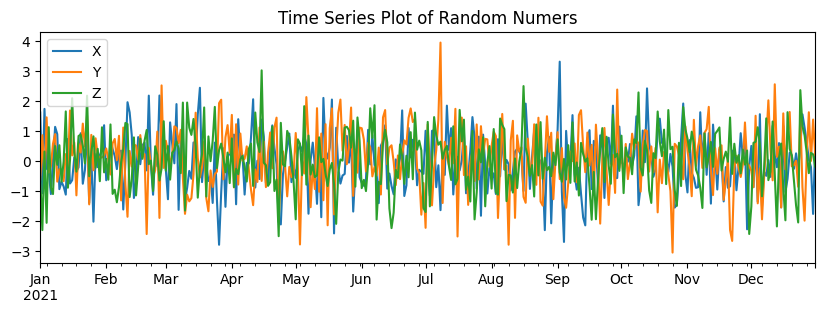

In [74]:
ts_df.plot(figsize=(10,3))
plt.title('Time Series Plot of Random Numers')
plt.show()

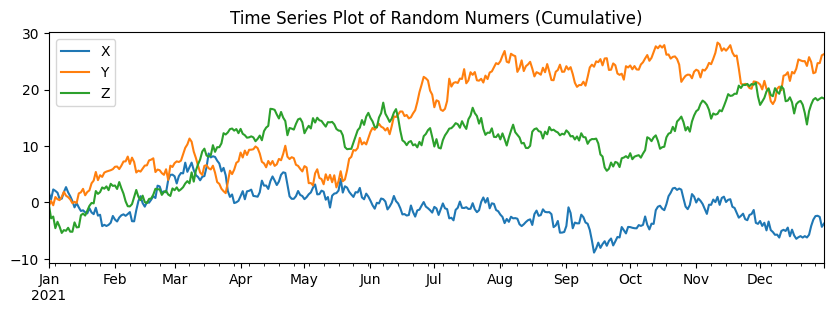

In [78]:
ts_df.cumsum().plot(figsize=(10,3))
plt.title('Time Series Plot of Random Numers (Cumulative)')
plt.show()

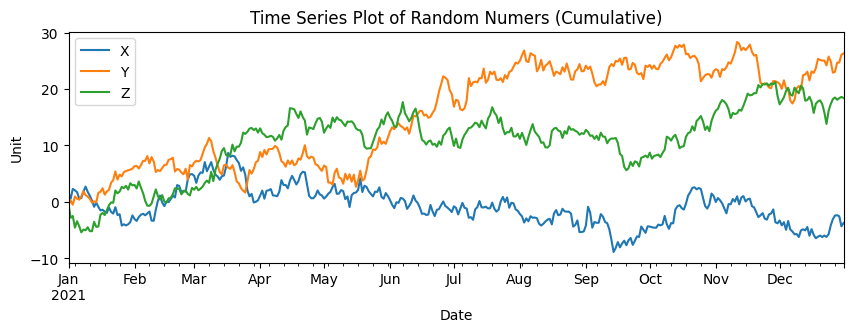

In [79]:
ts_df.cumsum().plot(figsize=(10,3))
plt.title('Time Series Plot of Random Numers (Cumulative)')
plt.xlabel('Date')
plt.ylabel('Unit')
plt.show()